# Prepare

Now we need to:

1. Test and make sure the functions from acquire.py work
2. Pull all the df from all the files
3. Marge all the df together:
    * I think we will still keep the data separate. Meaning one df for food_logs, one for activities and one for calories.

Key Notes: 

* After some trial and testing, I found that there were some different formats across the food logs. We will come back in the future, and try to sort this, but in the mean time, in the effort of time, I will ignore the food logs completely, and proceeed only using the calories and activities information.

* There seems to be that the activities for the last month period (11-01-12-28) is missing the last three weeks. Given the the specs say that we need to predict the next 2 weeks, I think that this is not what we need to predict, and instead it is just missing data that needs to be imputted. I have filled the null values with zero, as it could be that the subject did not wear his fitbit during this time. Another strategy that I am considering at this time is to actually impude the missing valuses with the mean of the first have of the month. 

In [1]:
import acquire
import pandas as pd
import numpy as np

In [2]:
filename = '2018-11-28_through_2018-12-28.csv'

In [3]:
calories, activities = acquire.get_data(filename)

In [4]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-11-28 to 2018-12-28
Data columns (total 1 columns):
calories    31 non-null float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [5]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2018-11-28 to 2018-12-06
Data columns (total 9 columns):
Calories Burned           9 non-null float64
Steps                     9 non-null float64
Distance                  9 non-null float64
Floors                    9 non-null float64
Minutes Sedentary         9 non-null float64
Minutes Lightly Active    9 non-null float64
Minutes Fairly Active     9 non-null float64
Minutes Very Active       9 non-null float64
Activity Calories         9 non-null float64
dtypes: float64(9)
memory usage: 720.0 bytes


In [6]:
activities

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-11-28,3088.0,7602.0,3.59,16.0,717.0,272.0,0.0,0.0,1361.0
2018-11-29,3693.0,12380.0,6.56,18.0,717.0,258.0,15.0,53.0,2051.0
2018-11-30,3269.0,9559.0,4.51,14.0,699.0,288.0,12.0,6.0,1577.0
2018-12-01,3813.0,14510.0,7.27,7.0,527.0,233.0,22.0,67.0,2124.0
2018-12-02,3957.0,13257.0,6.23,195.0,725.0,265.0,13.0,70.0,2305.0
2018-12-03,3660.0,12915.0,6.12,6.0,782.0,219.0,40.0,51.0,1993.0
2018-12-04,3384.0,13763.0,6.49,13.0,608.0,199.0,11.0,67.0,1663.0
2018-12-05,3670.0,13865.0,6.52,12.0,739.0,200.0,12.0,69.0,1968.0
2018-12-06,3669.0,14774.0,6.96,9.0,647.0,198.0,4.0,78.0,1962.0


----------------------

# Merging all DFs

In [7]:
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

path = '.'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))

In [8]:
result

['2018-09-27_through_2018-10-27.csv',
 '2018-07-28_through_2018-08-26.csv',
 '2018-06-27_through_2018-07-27.csv',
 '2018-04-26_through_2018-05-26.csv',
 '2018-10-28_through-2018-11-27.csv',
 '2018-11-28_through_2018-12-28.csv',
 '2018-05-27_through_2018-06-26.csv']

In [9]:
df = pd.DataFrame([])
df_1 = pd.DataFrame([])
for i, elem in enumerate(result):
    rows = acquire.read_csv_file(elem)
    calories = acquire.get_calories(rows)
    df = pd.concat([df, calories])
    activities = acquire.get_activities(rows)
    df_1 = pd.concat([df_1, activities])

In [10]:
df_1.shape

(194, 9)

In [11]:
df.shape

(216, 1)

In [12]:
df_1.index.sort_values()

DatetimeIndex(['2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29',
               '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-05',
               ...
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06'],
              dtype='datetime64[ns]', name='Date', length=194, freq=None)

In [13]:
fitbit = pd.concat([df,df_1], axis=1)

In [14]:
fitbit["Calories Burned"] = fitbit["Calories Burned"].fillna(fitbit["2018-11-28":]["Calories Burned"].mean())

In [15]:
for col in fitbit:
    fitbit[col] = fitbit[col].fillna(fitbit["2018-11-28":][col].mean())

In [16]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2018-04-26 to 2018-12-28
Data columns (total 10 columns):
calories                  216 non-null float64
Calories Burned           216 non-null float64
Steps                     216 non-null float64
Distance                  216 non-null float64
Floors                    216 non-null float64
Minutes Sedentary         216 non-null float64
Minutes Lightly Active    216 non-null float64
Minutes Fairly Active     216 non-null float64
Minutes Very Active       216 non-null float64
Activity Calories         216 non-null float64
dtypes: float64(10)
memory usage: 28.6 KB


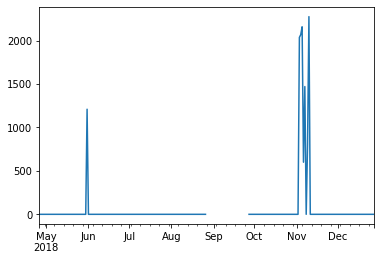

In [48]:
fitbit.calories.resample("D").mean().plot.line()

It seems that we are missing a month worth of data, between the end of august adn the end of september. We will need to fill this data.

In [18]:
aug = fitbit["2018-08"]

fitbit["2018-08-27":"2018-09-26"] = aug

In [19]:
r = pd.date_range(start=fitbit.index.min(), end=fitbit.index.max())

In [20]:
fitbit = fitbit.reindex(r)

In [68]:
for col in fitbit:
    impude_value = fitbit["2018-08"][col].resample("M").mean()[0]
    fitbit[col] = fitbit[col].fillna(impude_value)

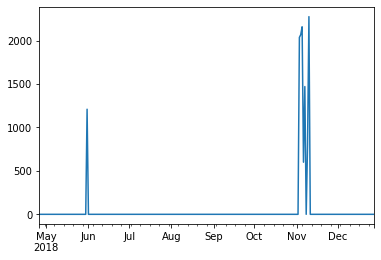

In [69]:
fitbit.calories.resample("D").mean().plot.line()

We have reindex the index, to add the missing gap. We then filled the new na values with the mean score from the previous month. Given that in many ways, exercise is largely dependent on what you previously did, it makes sense that by using the privious month, we can atleast approximate how much exercise the subject did. There is the risk that the subject did not exercise during this time (which could explain why the data is missing). However, given that we don't have any evidence (and the fact that the subject is likely part of an experiment, then it is unlikely that the subject would so drastically change its behavio)

A quick note on `calories`. Because the subject only seemed to record its caloric intake on some days, and not on a consistent basis, I used the mean of the caloric intake from the days where the subject did record its intake, and replaced the zeros with this mean, so that we can atleast have a better way to calculate net caloric gain.

We are now ready to proceed to the exploration stage. The data has been succesfully acquired and prepared.